# Text Classification with ML


### Student Details
##### A005 - Saurabh Chaudhari
##### A006 - Bharvi Chavda
##### A029 - Ruchika Gangadhar Karoo

**Overview**

+ Dataset: Udemy Courses
+ Goal: Predict the subject/category of course title
+ Feature Variable:- Course_title
+ Target Variable: Subject
+ We are Assigning text to their predefined category or class


**Workflow**

+ EDA
+ Building Features From the Text
    - Vectorization (Tfidf,CountVectorizer)
+ Model Building
    - Logistic Regression
    - Multinomial Navie Bayes    
+ Model Evaluation
+ User Testing of Model

#### Installing Necessary Libraries

In [44]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


#### Importing Libraries

In [45]:
import pandas as pd
import neattext.functions as nfx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

#### Loading Dataset

In [46]:
df = pd.read_csv("udemy_courses.csv")

#### Basic Analysis

In [47]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [48]:
# Shape
df.shape

(3683, 12)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   object
 4   price                3683 non-null   object
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


In [50]:
#Checking NULL Values
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [51]:
## X and Y Variables

df[['course_title','subject']]

,course_title,subject
0,Ultimate Investment Banking Course,Business Finance
1,Complete GST Course & Certification - Grow You...,Business Finance
2,Financial Modeling for Business Analysts and C...,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance
4,How To Maximize Your Profits Trading Options,Business Finance
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Web Development
3679,How To Design A WordPress Website With No Codi...,Web Development
3680,Learn and Build using Polymer,Web Development
3681,CSS Animations: Create Amazing Effects on Your...,Web Development


In [52]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

### Text Preprocessing
+ Reduce Noise
    - Punct
    - Special Char
    - Stopword
+ Lemmatization/Stemming

In [53]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [54]:
df['course_title'].apply(nfx.remove_stopwords)

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow Pra...
2        Financial Modeling Business Analysts Consultants
3            Beginner Pro - Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3678     Learn jQuery Scratch - Master JavaScript library
3679                      Design WordPress Website Coding
3680                                  Learn Build Polymer
3681       CSS Animations: Create Amazing Effects Website
3682            MODX CMS Build Websites: Beginner's Guide
Name: course_title, Length: 3683, dtype: object

***Remove stopwords***

In [55]:
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [56]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3679,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3680,Learn Build Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


***Remove special characters***

In [57]:
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

***Reduce to lowercase***


In [58]:
df['clean_course_title'] = df['clean_course_title'].str.lower()

In [59]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,ultimate investment banking course,Ultimate Investment Banking Course
1,complete gst course certification grow practice,Complete GST Course & Certification - Grow You...
2,financial modeling business analysts consultants,Financial Modeling for Business Analysts and C...
3,beginner pro financial analysis excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,maximize profits trading options,How To Maximize Your Profits Trading Options
...,...,...
3678,learn jquery scratch master javascript library,Learn jQuery from Scratch - Master of JavaScri...
3679,design wordpress website coding,How To Design A WordPress Website With No Codi...
3680,learn build polymer,Learn and Build using Polymer
3681,css animations create amazing effects website,CSS Animations: Create Amazing Effects on Your...


### Building Features From the Text
+ Convert words to vectors of number
+ Tfidf
+ Count
+ Hashvec

In [60]:
Xfeatures = df['clean_course_title']
ylabels = df['subject']

In [61]:
Xfeatures

0                      ultimate investment banking course
1       complete gst course  certification  grow practice
2        financial modeling business analysts consultants
3             beginner pro  financial analysis excel 2017
4                        maximize profits trading options
                              ...                        
3678      learn jquery scratch  master javascript library
3679                      design wordpress website coding
3680                                  learn build polymer
3681        css animations create amazing effects website
3682              modx cms build websites beginners guide
Name: clean_course_title, Length: 3683, dtype: object

In [62]:
# Initialize TfidfVectorizer
tfidf_vec = TfidfVectorizer()

# Fit and Transform
X = tfidf_vec.fit_transform(Xfeatures)

feature_names = tfidf_vec.get_feature_names_out()

print("TF-IDF Matrix:")
print(X.toarray())
print("Feature Names:")
print(feature_names)


TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
['000005' '001' '01' ... 'zu' 'zuhause' 'zur']


### Building Models


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [65]:
x_train.shape

(2578, 3564)

***Model 1: Logistic Regression***

In [66]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [67]:
lr_model.score(x_test,y_test)

0.9547511312217195

***Model 2: MutinomialNB***

In [68]:
nv_model = MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [69]:
# 2nd Model Acccuracy
nv_model.score(x_test,y_test)

0.9393665158371041

### Evaluating model

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
y_pred = lr_model.predict(x_test)

In [72]:
confusion_matrix = metrics.confusion_matrix(y_pred, y_test)

In [73]:
confusion_matrix

array([[382,  20,   8,   5],
       [  1, 142,   0,   2],
       [  1,   1, 183,   0],
       [  2,   9,   1, 348]], dtype=int64)

Let :       
A = 'Business Finance'              
B = 'Graphic Design'              
C = 'Musical Instruments'              
D = 'Web Development'        

In [74]:
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A', 'B', 'C','D'] )

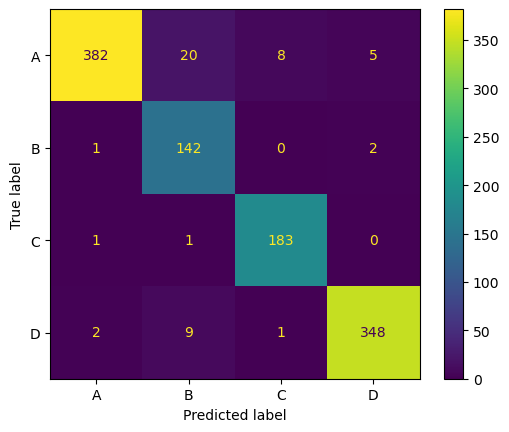

In [75]:
#plt.xticks(fontsize=10)
cm.plot()
plt.show()

***Classification Report***

In [76]:
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.92      0.95       415
     Graphic Design       0.83      0.98      0.90       145
Musical Instruments       0.95      0.99      0.97       185
    Web Development       0.98      0.97      0.97       360

           accuracy                           0.95      1105
          macro avg       0.94      0.96      0.95      1105
       weighted avg       0.96      0.95      0.96      1105



In [77]:
y_pred2 = nv_model.predict(x_test)

In [78]:
confusion_matrix = metrics.confusion_matrix(y_pred2, y_test)

In [79]:
confusion_matrix

array([[363,   6,   4,   4],
       [  2, 140,   1,   0],
       [  3,   2, 184,   0],
       [ 18,  24,   3, 351]], dtype=int64)

In [80]:
cm2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ['A', 'B', 'C','D'])

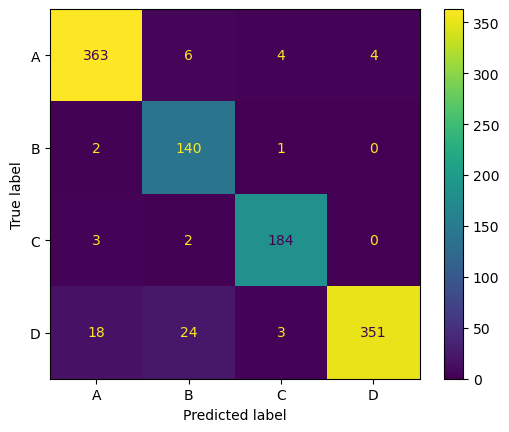

In [81]:
cm2.plot()
plt.show()

### User Testing of Model

In [82]:
user_input = input()

 Risk Management


In [83]:
def vectorize_text(text):
    my_vec = tfidf_vec.transform([text])
    return my_vec.toarray()

In [84]:
vectorize_text(user_input)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [85]:
sample1 = vectorize_text(user_input)

In [86]:
lr_model.predict(sample1)

array(['Business Finance'], dtype=object)

***Prediction Probabilty***

In [87]:
lr_model.predict_proba(sample1)

array([[0.82667213, 0.05303814, 0.05045551, 0.06983422]])

In [88]:
lr_model.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [89]:
nv_model.predict_proba(sample1)

array([[0.88366176, 0.02964417, 0.03201422, 0.05467985]])

Future Scope of Naive Bayes text Classifier can be Linear Support Vector Machine, this model is said to achieve 5% higher accuracy than Naive Bayes.       
Some other alternative are:
1. Support Vector machines
2. Perceptron Algorithm
3. Random Forest

                                            ****************************
